### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading Train dataset into DataFrame

In [2]:
train = pd.read_csv("ticdata2000.csv",  sep='\t')
train.head()

,33,1,3,2,8,0,5,1.1,3.1,7,...,0.37,0.38,0.39,1.13,0.40,0.41,0.42,0.43,0.44,0.45
0,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
2,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
3,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
4,23,1,2,1,5,0,5,0,5,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
rows = train.shape[0]
cols = train.shape[1]

print(f"The above Train Dataset has \033[1m {rows} rows\033[0m and \033[1m{cols} columns \033[0m.")

The above Train Dataset has  5821 rows and 86 columns .


### Finding missing values

In [4]:
missing_values = [[features,train[features].isna().sum()] for features in train.columns if train[features].isna().sum() > 0]
missing_values

[]

### Observation

There are **N0** missing values.

### Duplicate Values

In [5]:
print(f"There are \033[1m {train.duplicated().sum()}\033[0m duplicate rows.")

There are  602 duplicate rows.


### Dropping Duplicates

In [6]:
train.drop_duplicates(inplace=True)

In [7]:
rows = train.shape[0]
cols = train.shape[1]

print(f"New shape of Train Dataset has \033[1m {rows} rows\033[0m and \033[1m{cols} columns \033[0m.")

New shape of Train Dataset has  5219 rows and 86 columns .


### Seprating Target Variable

In [8]:
X_train = train.iloc[:,:85]
y_train = train.iloc[:,85]

In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

X_train, y_train = smote.fit_resample(X_train,y_train)

### Fitting Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
clf = RandomForestClassifier(oob_score=True, n_jobs=500,max_depth=90)

clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=90, n_jobs=500, oob_score=True)

### Importing Testing Dataset

In [12]:
x_test = pd.read_csv("ticeval2000.csv",  sep='\t')
x_test.head()

,33,1,4,2,8,0,6,0.1,3,5,...,0.37,0.38,0.39,0.40,1.12,0.41,0.42,0.43,0.44,0.45
0,6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
1,39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
2,9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
3,31,1,2,4,7,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0
4,30,1,2,4,7,1,4,2,3,5,...,0,0,0,0,2,0,0,0,0,0


In [13]:
y_pred = clf.predict(x_test)

In [14]:
y_test = pd.read_csv("tictgts2000.csv",  sep='\t')
y_test.head()

,0
0,1
1,0
2,0
3,0
4,0


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [16]:
score = accuracy_score(y_test, y_pred) * 100
print("Model Accuracy is \033[1m{0:.2f}%\033[0m ".format(score))

Model Accuracy is 91.65% 


In [17]:
cm = confusion_matrix(y_test, y_pred)
print("\033[1mConfusion Matrix:\033[0m\n",cm)

Confusion Matrix:
 [[3638  123]
 [ 211   27]]


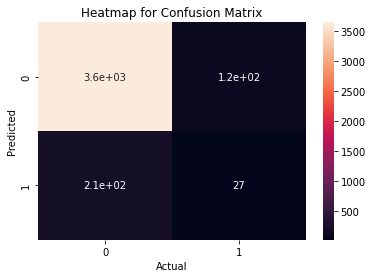

In [18]:
sns.heatmap(cm,annot=True)
plt.title("Heatmap for Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [19]:
print("\033[1mClassification Report\033[0m\n\n", classification_report(y_test, y_pred))

Classification Report

               precision    recall  f1-score   support

           0       0.95      0.97      0.96      3761
           1       0.18      0.11      0.14       238

    accuracy                           0.92      3999
   macro avg       0.56      0.54      0.55      3999
weighted avg       0.90      0.92      0.91      3999



### Fitting Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
y_pred = clf.predict(x_test)

In [22]:
score = accuracy_score(y_test, y_pred) * 100
print("Model Accuracy is \033[1m{0:.2f}%\033[0m ".format(score))

Model Accuracy is 87.35% 


In [23]:
cm = confusion_matrix(y_test, y_pred)
print("\033[1mConfusion Matrix:\033[0m\n",cm)

Confusion Matrix:
 [[3457  304]
 [ 202   36]]


### Gradient Boost

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X_train,y_train)

GradientBoostingClassifier()

In [25]:
y_pred = clf.predict(x_test)

In [26]:
score = accuracy_score(y_test, y_pred) * 100
print("Model Accuracy is \033[1m{0:.2f}%\033[0m ".format(score))

Model Accuracy is 89.05% 


In [27]:
cm = confusion_matrix(y_test, y_pred)
print("\033[1mConfusion Matrix:\033[0m\n",cm)

Confusion Matrix:
 [[3511  250]
 [ 188   50]]


In [55]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train,y_train)

SVC()

In [56]:
y_pred = clf.predict(x_test)

In [57]:
score = accuracy_score(y_test, y_pred) * 100
print("Model Accuracy is \033[1m{0:.2f}%\033[0m ".format(score))

Model Accuracy is 93.40% 


In [58]:
cm = confusion_matrix(y_test, y_pred)
print("\033[1mConfusion Matrix:\033[0m\n",cm)

Confusion Matrix:
 [[3723   38]
 [ 226   12]]


### Observation

SVM is the best model among Random Forest, Gradient Boost and Decision Tree.